In [3]:
import numpy as np
import matplotlib.pyplot as plt

导导

## 初始化数据集

In [11]:
x = np.random.rand(100, 1)
noise = np.random.rand(100, 1)
y = 2 * x + 1 +noise

## y = 2x+1

# 计算特征值

In [12]:
one = np.ones(x.shape)
x_b = np.c_[one, x]
theta = np.dot(np.linalg.inv(x_b.T @ x_b) @ x_b.T, y)
print(theta)

[[1.53659363]
 [1.91408197]]


# 绘图

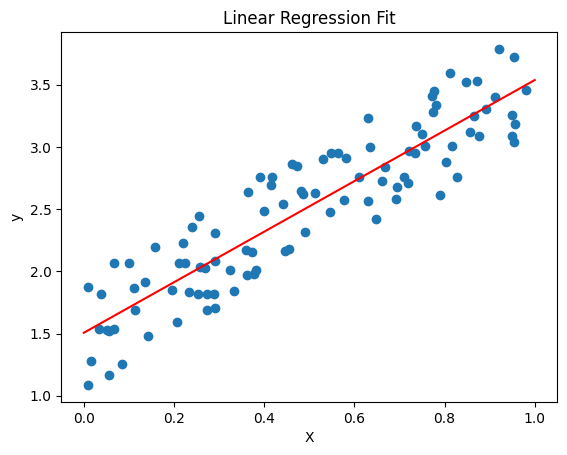

In [6]:
X_new = np.array([[0], [1]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # 添加 x0 = 1
y_predict = X_new_b @ theta


plt.plot(X_new, y_predict, "r-") # 画出红色的拟合直线
plt.scatter(x, y)                # 画出原始数据点
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.show()

# 使用真实数据集

In [22]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = housing.data[:, 2:3]
y = housing.target.reshape(-1, 1)
ones = np.ones(X.shape)
X_b = np.c_[ones, X]
theta1 = np.linalg.inv(X_b.T @ X_b) @ (X_b.T @ y)
print(theta1)

[[1.68381151]
 [0.07086879]]


# 绘图

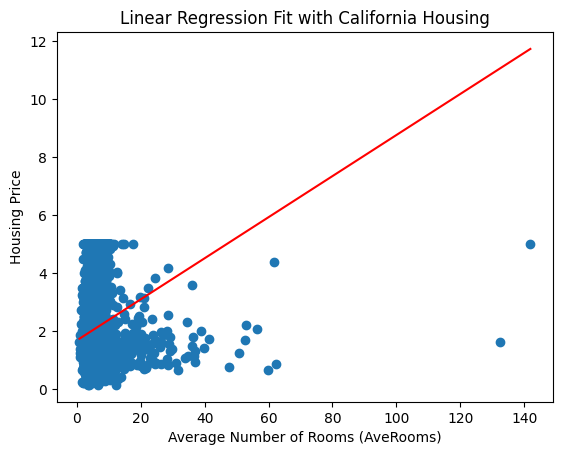

In [23]:
X_new = np.array([[X.min()], [X.max()]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # 添加 x0 = 1
y_predict = X_new_b @ theta1


plt.plot(X_new, y_predict, "r-") # 画出红色的拟合直线
plt.scatter(X, y)                # 画出原始数据点
plt.xlabel("Average Number of Rooms (AveRooms)")
plt.ylabel("Housing Price")
plt.title("Real Estate Price vs. Number of Rooms")
plt.title("Linear Regression Fit with California Housing")
plt.show()

一个简单的线性回归模型可能不足以完全描述这些数据背后的复杂规律。

# 梯度下降

[[1.58844837]
 [1.81055154]]
[[1.62976609]
 [1.72805877]]


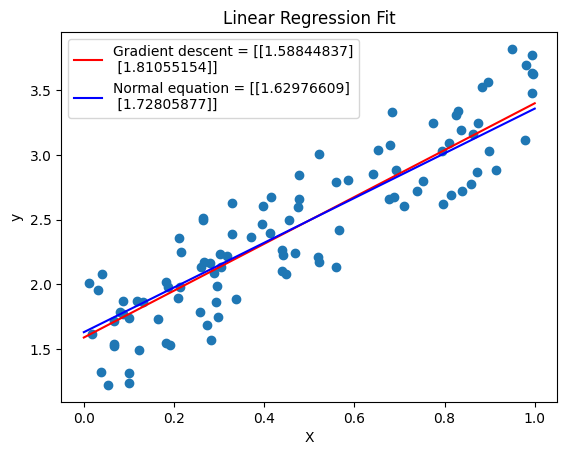

In [33]:
def gradient_descent(X, y, alpha, num_iters):
    theta = np.random.randn(X.shape[1],1)
    m = len(y)
    for i in range(num_iters):
        grad = 2/m * X.T @(X@theta - y)
        theta = theta - alpha * grad
    return theta
theta1 = gradient_descent(x_b, y, 0.1, 100)
print(theta1)
print(theta)
X_new = np.array([[0], [1]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # 添加 x0 = 1
y_predict = X_new_b @ theta1
y_predict_normal = X_new_b @ theta
plt.plot(X_new, y_predict, "r-", label=f"Gradient descent = {theta1}") # 画出红色的拟合直线
plt.plot(X_new, y_predict_normal, "b-", label=f"Normal equation = {theta}")
plt.scatter(x, y)                # 画出原始数据点
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()
